In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet
import warnings

warnings.filterwarnings("ignore")

Importing plotly failed. Interactive plots will not work.


In [2]:
df_age = pd.read_csv('C:/Users/12489/ALOKPARNA/Masters@WSU/Fall2020/Intelligent_Systems/Project_Tourism/Data/Enter_korea_by_age.csv', parse_dates=['date'])
df_age

,date,nation,visitor,growth,share,age0-20,age21-30,age31-40,age41-50,age51-60,age61
0,2019-01-01,China,392814,28.737870,35.555117,36520,108591,103657,48574,40893,40998
1,2019-01-01,Japan,206526,23.606830,18.693468,18015,57921,34165,39811,33857,20330
2,2019-01-01,Taiwan,87954,16.003693,7.961057,18888,17927,18595,18862,8169,4566
3,2019-01-01,Hong Kong,35896,3.533212,3.249086,3890,11384,7400,5461,4629,2137
4,2019-01-01,Macao,2570,-12.376406,0.232621,223,1013,762,264,181,92
...,...,...,...,...,...,...,...,...,...,...,...
955,2020-04-01,Oceania others,13,-97.239915,0.044195,0,0,0,0,0,0
956,2020-04-01,South Africa,22,-98.101812,0.074792,0,1,4,0,0,0
957,2020-04-01,Africa others,177,-95.412131,0.601734,3,9,16,6,2,0
958,2020-04-01,Stateless,3,-95.312500,0.010199,0,0,0,0,0,0


In [3]:
# Data Preprocessing
# Adding a filter to the nation column to get the data for China
df_age_china = df_age.loc[df_age['nation'] == 'China']
df_age_china

,date,nation,visitor,growth,share,age0-20,age21-30,age31-40,age41-50,age51-60,age61
0,2019-01-01,China,392814,28.737870,35.555117,36520,108591,103657,48574,40893,40998
60,2019-02-01,China,453379,31.284441,37.724933,33333,136272,122438,64289,51696,35050
120,2019-03-01,China,487623,20.874389,31.753711,14459,137271,133971,64975,63774,60503
180,2019-04-01,China,493250,34.545722,30.166978,16492,134102,139617,65302,62969,61204
240,2019-05-01,China,500413,35.165657,33.682331,17011,138797,141104,66171,63504,58996
300,2019-06-01,China,475007,25.037708,32.177294,27351,138838,133662,60406,54228,47686
360,2019-07-01,China,519132,26.513573,35.849999,73000,136470,132334,67717,50810,45511
420,2019-08-01,China,578112,20.908521,36.444075,78339,160089,142873,76689,57236,46840
480,2019-09-01,China,541350,24.564249,37.087302,23689,168939,153165,67744,63315,52249
540,2019-10-01,China,567695,19.437542,34.277063,24779,174516,152825,69650,69340,62401


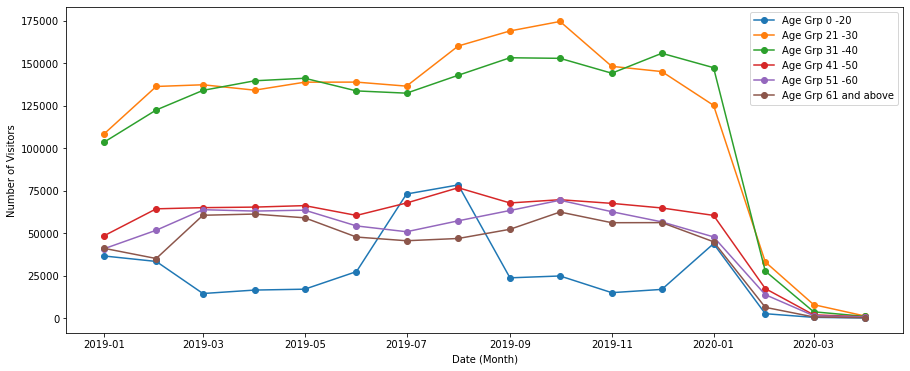

,age0_20,age21_30,age31_40,age41_50,age51_60,age61
date,,,,,,
2019-01-01,36520,108591,103657,48574,40893,40998
2019-02-01,33333,136272,122438,64289,51696,35050
2019-03-01,14459,137271,133971,64975,63774,60503
2019-04-01,16492,134102,139617,65302,62969,61204
2019-05-01,17011,138797,141104,66171,63504,58996
2019-06-01,27351,138838,133662,60406,54228,47686
2019-07-01,73000,136470,132334,67717,50810,45511
2019-08-01,78339,160089,142873,76689,57236,46840
2019-09-01,23689,168939,153165,67744,63315,52249


In [4]:
# Remove irrelevant columns
df_age_china = df_age_china.drop(columns=['nation', 'visitor', 'growth', 'share'])

# Set date as an index for time-series analysis
df_age_china = df_age_china.set_index('date')

# Rename columns for data analysis purpose
df_age_china = df_age_china.rename(columns = {"age0-20":"age0_20", "age21-30":"age21_30", "age31-40":"age31_40",
                                              "age41-50":"age41_50", "age51-60":"age51_60"})

# Plot the no. of visitors according to age grp who are from china
fig, ax=plt.subplots(figsize=(15,6))
ax.plot(df_age_china.age0_20, marker="o", label="Age Grp 0 -20")
ax.plot(df_age_china.age21_30, marker="o", label="Age Grp 21 -30")
ax.plot(df_age_china.age31_40, marker="o", label="Age Grp 31 -40")
ax.plot(df_age_china.age41_50, marker="o", label="Age Grp 41 -50")
ax.plot(df_age_china.age51_60, marker="o", label="Age Grp 51 -60")
ax.plot(df_age_china.age61, marker="o", label="Age Grp 61 and above")
ax.set_xlabel("Date (Month)")
ax.set_ylabel("Number of Visitors")
ax.legend(loc=1)
plt.show()

df_age_china

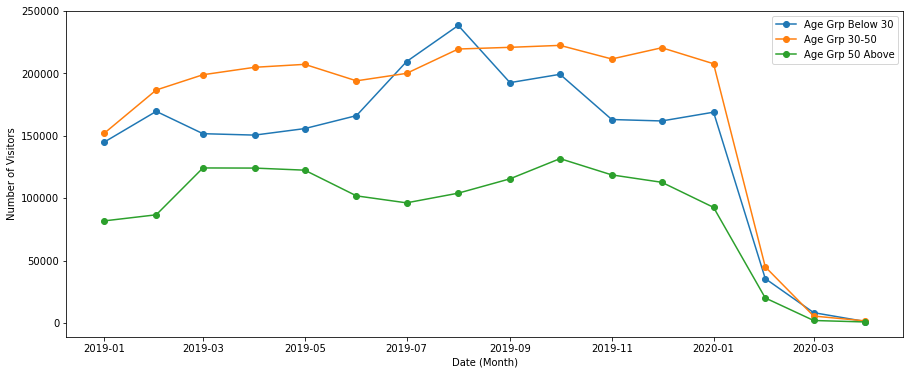

,ageBelow_30,age30_50,age50_above
date,,,
2019-01-01,145111,152231,81891
2019-02-01,169605,186727,86746
2019-03-01,151730,198946,124277
2019-04-01,150594,204919,124173
2019-05-01,155808,207275,122500
2019-06-01,166189,194068,101914
2019-07-01,209470,200051,96321
2019-08-01,238428,219562,104076
2019-09-01,192628,220909,115564


In [5]:
# Divide the visitor data into 3 groups: ageBelow_30, age30_50 and age50_above
df_age_china['ageBelow_30'] = df_age_china['age0_20'] + df_age_china['age21_30']
df_age_china['age30_50'] = df_age_china['age31_40'] + df_age_china['age41_50']
df_age_china['age50_above'] = df_age_china['age51_60'] + df_age_china['age61']
df_age_china = df_age_china.drop(columns=['age0_20', 'age21_30', 'age31_40', 'age41_50', 'age51_60', 'age61'])

# Plotting the no. of visitors according to age grp who are from china
fig, ax=plt.subplots(figsize=(15,6))
ax.plot(df_age_china.ageBelow_30, marker="o", label="Age Grp Below 30")
ax.plot(df_age_china.age30_50, marker="o", label="Age Grp 30-50")
ax.plot(df_age_china.age50_above, marker="o", label="Age Grp 50 Above")
ax.set_xlabel("Date (Month)")
ax.set_ylabel("Number of Visitors")
ax.legend(loc=1)
plt.show()

df_age_china

### Time Series Forcasting using ARIMA

In [6]:
# Find p ,q, d parameter combinations for Seasonal ARIMA
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [7]:
# Tourist data for age below 30 yrs
dfAgeBelow_30 = df_age_china['ageBelow_30']

# Training Dataset: Tourist data for the year 2019
train = dfAgeBelow_30['2019-01-01':'2020-01-01']

# Find the optimal value of p, d, q for best ARIMA model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:326.3664475079599
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:26.18977186774628
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:294.449404872674
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:32.07806081156747
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:255.71017636708717
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:235.29562559169383
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 1

In [8]:
# Fitting the ARIMA model on traing data (2019 data) based on lowest AIC score
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 0, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:              ageBelow_30   No. Observations:                   13
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                   0.000
Date:                  Thu, 17 Dec 2020   AIC                              2.000
Time:                          01:39:33   BIC                               -inf
Sample:                      01-01-2019   HQIC                               nan
                           - 01-01-2020                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       4.37e+07         -0       -inf      0.000    4.37e+07    4.37e+07
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                       

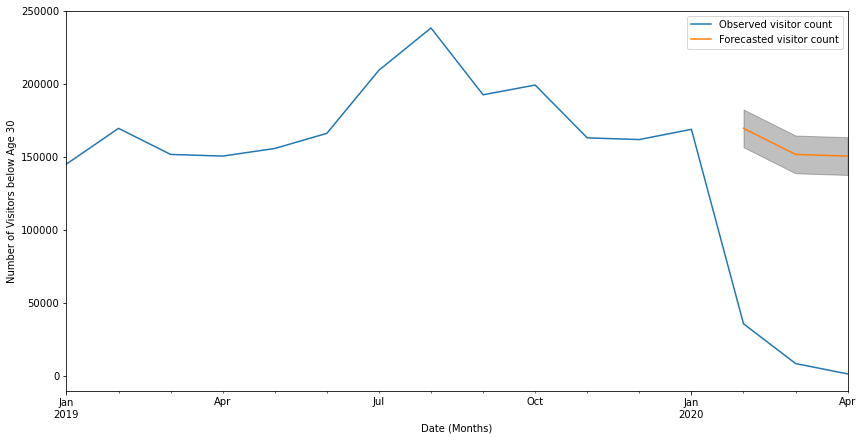

In [9]:
# Forcast visitor count for 2020
pred_uc = results.get_forecast(steps=3)
pred_ci = pred_uc.conf_int()
ax = dfAgeBelow_30.plot(label='Observed visitor count', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecasted visitor count')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date (Months)')
ax.set_ylabel('Number of Visitors below Age 30')
plt.legend()
plt.show()

Mean absolute error (MAE) between expected and predicted values: 142245.667


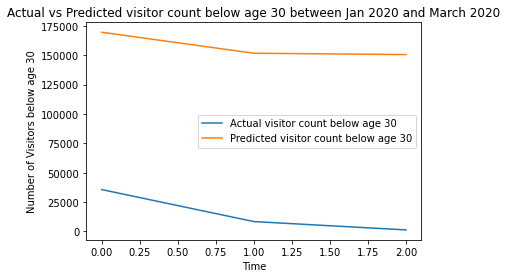

In [10]:
# Actual vs Predicted visitor count below age 30 between Jan 2020 and March 2020
df_below30_true = df_age_china['ageBelow_30'][13:].values
df_below30_pred = pred_uc.predicted_mean.values

# Calculate the mean absolute error between expected and predicted values
mae = mean_absolute_error(df_below30_true, df_below30_pred)
print('Mean absolute error (MAE) between expected and predicted values: %.3f' % mae)

# Plot the expected and predicted visitor count below age 30 between Jan 2020 and March 2020
plt.plot(df_below30_true, label='Actual visitor count below age 30')
plt.plot(df_below30_pred, label='Predicted visitor count below age 30')
plt.xlabel('Time')
plt.ylabel('Number of Visitors below age 30')
plt.title('Actual vs Predicted visitor count below age 30 between Jan 2020 and March 2020');
plt.legend()
plt.show()

In [11]:
# Tourist data for age between 30 yrs and 50 yrs
dfAge30_50 = df_age_china['age30_50']

# Training Dataset: Tourist data for the year 2019
train = dfAge30_50['2019-01-01':'2020-01-01']

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:329.97282065089496
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:25.464932698118563
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:297.22655737713603
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:32.84240552600341
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:236.34096226342362
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:216.59207902738464
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 

In [12]:
# Fitting the ARIMA model on traing data (2019 data) based on lowest AIC score
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 0, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:                 age30_50   No. Observations:                   13
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                   0.000
Date:                  Thu, 17 Dec 2020   AIC                              2.000
Time:                          01:39:37   BIC                               -inf
Sample:                      01-01-2019   HQIC                               nan
                           - 01-01-2020                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.372e+08         -0       -inf      0.000    2.37e+08    2.37e+08
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                       

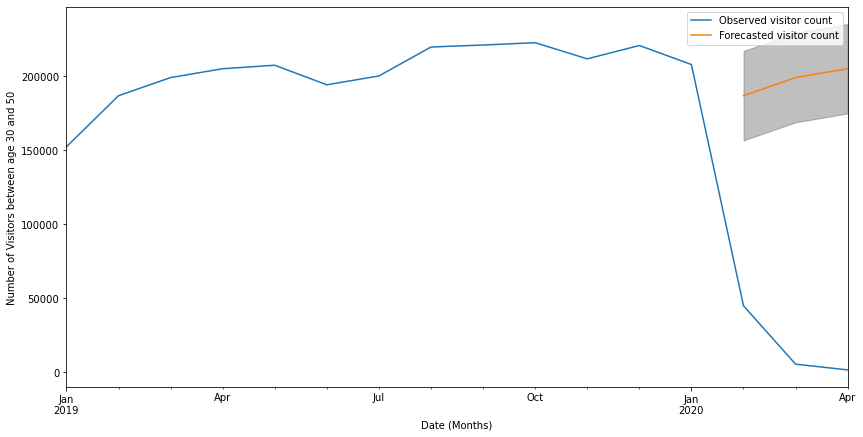

In [13]:
# Forcast visitor count for 2020
pred_uc = results.get_forecast(steps=3)
pred_ci = pred_uc.conf_int()
ax = dfAge30_50.plot(label='Observed visitor count', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecasted visitor count')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date (Months)')
ax.set_ylabel('Number of Visitors between age 30 and 50')
plt.legend()
plt.show()

Mean absolute error (MAE) between expected and predicted values: 179405.333


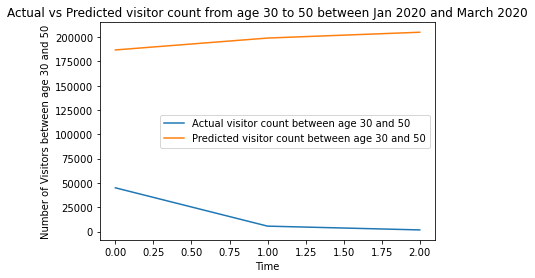

In [14]:
# Actual vs Predicted visitor count from age 30 to 50 between Jan 2020 and March 2020
df_age30_50_true = df_age_china['age30_50'][13:].values
df_age30_50_pred = pred_uc.predicted_mean.values

# Calculate the mean absolute error between expected and predicted values
mae = mean_absolute_error(df_age30_50_true, df_age30_50_pred)
print('Mean absolute error (MAE) between expected and predicted values: %.3f' % mae)

# Plot the expected and predicted visitor count from age 30 to 50 between Jan 2020 and March 2020
plt.plot(df_age30_50_true, label='Actual visitor count between age 30 and 50')
plt.plot(df_age30_50_pred, label='Predicted visitor count between age 30 and 50')
plt.xlabel('Time')
plt.ylabel('Number of Visitors between age 30 and 50')
plt.title('Actual vs Predicted visitor count from age 30 to 50 between Jan 2020 and March 2020');
plt.legend()
plt.show()

In [15]:
# Tourist data for age above 50 yrs
dfAgeAbove_50 = df_age_china['age50_above']

# Training Dataset: Tourist data for the year 2019
train = dfAgeAbove_50['2019-01-01':'2020-01-01']

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:315.0506851900715
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:25.109739887600117
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:283.1765231190003
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:31.1152719126195
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:246.76320441007104
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:220.64657423654424
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 

In [16]:
# Fitting the ARIMA model on traing data (2019 data) based on lowest AIC score
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 0, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:              age50_above   No. Observations:                   13
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                   0.000
Date:                  Thu, 17 Dec 2020   AIC                              2.000
Time:                          01:39:40   BIC                               -inf
Sample:                      01-01-2019   HQIC                               nan
                           - 01-01-2020                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.964e+06         -0       -inf      0.000    8.96e+06    8.96e+06
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                       

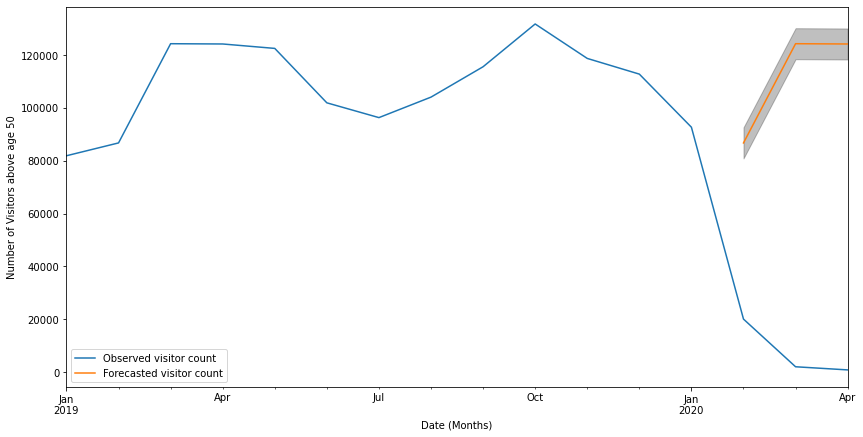

In [17]:
# Forcast visitor count for 2020
pred_uc = results.get_forecast(steps=3)
pred_ci = pred_uc.conf_int()
ax = dfAgeAbove_50.plot(label='Observed visitor count', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecasted visitor count')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date (Months)')
ax.set_ylabel('Number of Visitors above age 50')
plt.legend()
plt.show()

Mean absolute error (MAE) between expected and predicted values: 104047.333


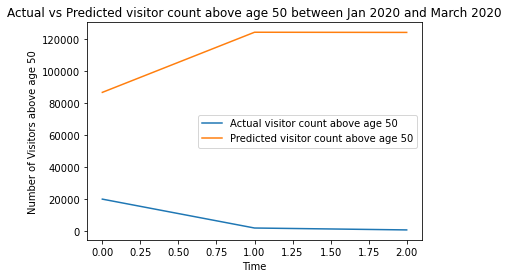

In [18]:
# Actual vs Predicted visitor count above age 50 between Jan 2020 and March 2020
df_above50_true = df_age_china['age50_above'][13:].values
df_above50_pred = pred_uc.predicted_mean.values

# Calculate the mean absolute error between expected and predicted values
mae = mean_absolute_error(df_above50_true, df_above50_pred)
print('Mean absolute error (MAE) between expected and predicted values: %.3f' % mae)

# Plot the expected and predicted visitor count above age 50 between Jan 2020 and March 2020
plt.plot(df_above50_true, label='Actual visitor count above age 50')
plt.plot(df_above50_pred, label='Predicted visitor count above age 50')
plt.xlabel('Time')
plt.ylabel('Number of Visitors above age 50')
plt.title('Actual vs Predicted visitor count above age 50 between Jan 2020 and March 2020');
plt.legend()
plt.show()

### Time Series Modeling with Prophet

In [19]:
# Reset index and flatten dataset
df_age_china = df_age_china.reset_index()

# Training Dataset: Tourist data for the year 2019
df_age_china2019 = df_age_china[:13]
print(df_age_china2019)

# Prepare the dataset for modeling with Prophet
df_below30 = df_age_china2019.drop(columns=['age30_50', 'age50_above'])
df_below30 = df_below30.rename(columns={'date': 'ds', 'ageBelow_30': 'y'})
print(df_below30)

df_age30_50 = df_age_china2019.drop(columns=['ageBelow_30', 'age50_above'])
df_age30_50 = df_age30_50.rename(columns={'date': 'ds', 'age30_50': 'y'})
print(df_age30_50)

df_above50 = df_age_china2019.drop(columns=['ageBelow_30', 'age30_50'])
df_above50 = df_above50.rename(columns={'date': 'ds', 'age50_above': 'y'})
print(df_above50)

         date  ageBelow_30  age30_50  age50_above
0  2019-01-01       145111    152231        81891
1  2019-02-01       169605    186727        86746
2  2019-03-01       151730    198946       124277
3  2019-04-01       150594    204919       124173
4  2019-05-01       155808    207275       122500
5  2019-06-01       166189    194068       101914
6  2019-07-01       209470    200051        96321
7  2019-08-01       238428    219562       104076
8  2019-09-01       192628    220909       115564
9  2019-10-01       199295    222475       131741
10 2019-11-01       163074    211576       118711
11 2019-12-01       161928    220581       112775
12 2020-01-01       168946    207760        92686
           ds       y
0  2019-01-01  145111
1  2019-02-01  169605
2  2019-03-01  151730
3  2019-04-01  150594
4  2019-05-01  155808
5  2019-06-01  166189
6  2019-07-01  209470
7  2019-08-01  238428
8  2019-09-01  192628
9  2019-10-01  199295
10 2019-11-01  163074
11 2019-12-01  161928
12 2020-01-01 

In [20]:
# Forcast visitor count below age 30
df_below30_model = Prophet(interval_width=0.95)
df_below30_model.fit(df_below30)
df_below30_forecast = df_below30_model.make_future_dataframe(periods=3, freq='MS')
df_below30_forecast = df_below30_model.predict(df_below30_forecast)

# Forcast visitor count between age 30 and 50
df_age30_50_model = Prophet(interval_width=0.95)
df_age30_50_model.fit(df_age30_50)
df_age30_50_forecast = df_age30_50_model.make_future_dataframe(periods=3, freq='MS')
df_age30_50_forecast = df_age30_50_model.predict(df_age30_50_forecast)

# Forcast visitor count above age 50
df_above50_model = Prophet(interval_width=0.95)
df_above50_model.fit(df_above50)
df_above50_forecast = df_above50_model.make_future_dataframe(periods=3, freq='MS')
df_above50_forecast = df_above50_model.predict(df_above50_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disab

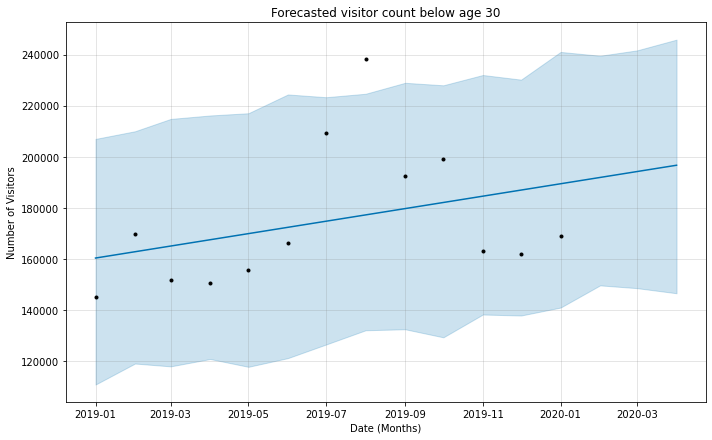

In [21]:
# Forecasted visitor count below age 30
df_below30_model.plot(df_below30_forecast, xlabel = 'Date (Months)', ylabel = 'Number of Visitors')
plt.title('Forecasted visitor count below age 30');

Mean absolute error (MAE) between expected and predicted values: 179187.768


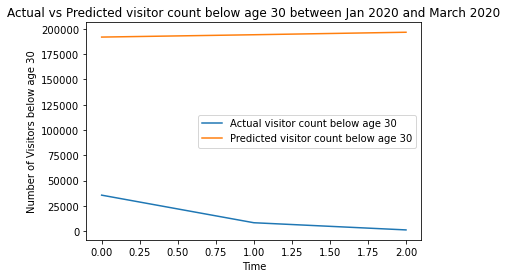

In [22]:
# Actual vs Predicted visitor count below age 30 between Jan 2020 and March 2020
df_below30_true = df_age_china['ageBelow_30'][13:].values
df_below30_pred = df_below30_forecast['yhat'][13:].values

# Calculate the mean absolute error between expected and predicted values
mae = mean_absolute_error(df_below30_true, df_below30_pred)
print('Mean absolute error (MAE) between expected and predicted values: %.3f' % mae)

# Plot the expected and predicted visitor count below age 30 between Jan 2020 and March 2020
plt.plot(df_below30_true, label='Actual visitor count below age 30')
plt.plot(df_below30_pred, label='Predicted visitor count below age 30')
plt.xlabel('Time')
plt.ylabel('Number of Visitors below age 30')
plt.title('Actual vs Predicted visitor count below age 30 between Jan 2020 and March 2020');
plt.legend()
plt.show()

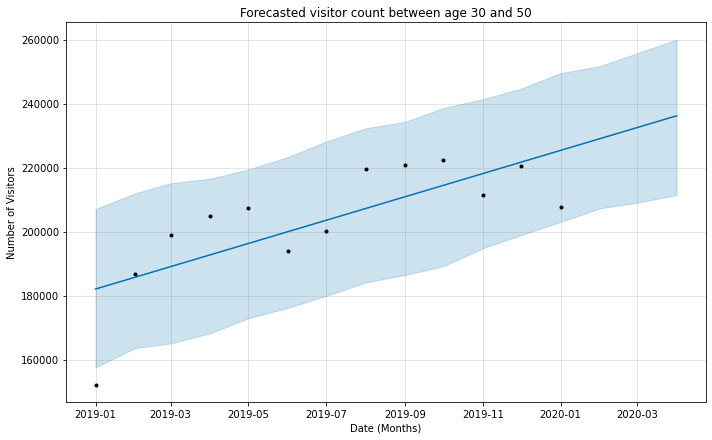

In [23]:
# Forecasted visitor count between age 30 and 50
df_age30_50_model.plot(df_age30_50_forecast, xlabel = 'Date (Months)', ylabel = 'Number of Visitors')
plt.title('Forecasted visitor count between age 30 and 50');

Mean absolute error (MAE) between expected and predicted values: 215109.925


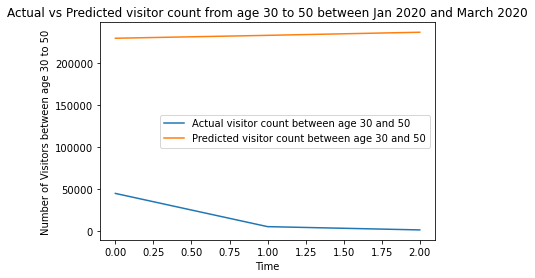

In [24]:
# Actual vs Predicted visitor count from age 30 to 50 between Jan 2020 and March 2020
df_age30_50_true = df_age_china['age30_50'][13:].values
df_age30_50_pred = df_age30_50_forecast['yhat'][13:].values

# Calculate the mean absolute error between expected and predicted values
mae = mean_absolute_error(df_age30_50_true, df_age30_50_pred)
print('Mean absolute error (MAE) between expected and predicted values: %.3f' % mae)

# Plot the expected and predicted visitor count from age 30 to 50 between Jan 2020 and March 2020
plt.plot(df_age30_50_true, label='Actual visitor count between age 30 and 50')
plt.plot(df_age30_50_pred, label='Predicted visitor count between age 30 and 50')
plt.xlabel('Time')
plt.ylabel('Number of Visitors between age 30 to 50')
plt.title('Actual vs Predicted visitor count from age 30 to 50 between Jan 2020 and March 2020');
plt.legend()
plt.show()

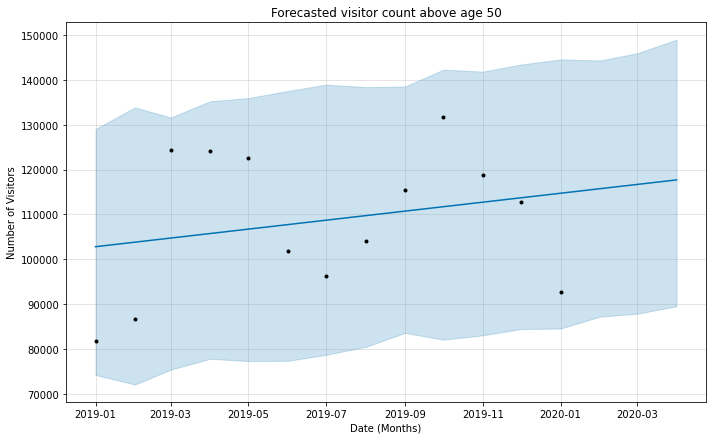

In [25]:
# Forecasted visitor count above age 50
df_above50_model.plot(df_above50_forecast, xlabel = 'Date (Months)', ylabel = 'Number of Visitors')
plt.title('Forecasted visitor count above age 50');

Mean absolute error (MAE) between expected and predicted values: 109028.874


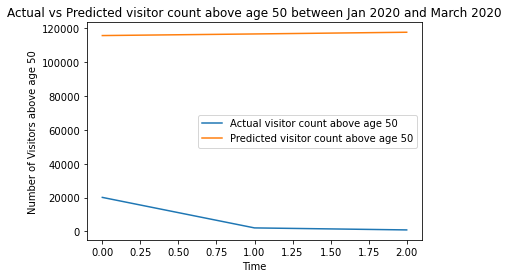

In [26]:
# Actual vs Predicted visitor count above age 50 between Jan 2020 and March 2020
df_above50_true = df_age_china['age50_above'][13:].values
df_above50_pred = df_above50_forecast['yhat'][13:].values

# Calculate the mean absolute error between expected and predicted values
mae = mean_absolute_error(df_above50_true, df_above50_pred)
print('Mean absolute error (MAE) between expected and predicted values: %.3f' % mae)

# Plot the expected and predicted visitor count above age 50 between Jan 2020 and March 2020
plt.plot(df_above50_true, label='Actual visitor count above age 50')
plt.plot(df_above50_pred, label='Predicted visitor count above age 50')
plt.xlabel('Time')
plt.ylabel('Number of Visitors above age 50')
plt.title('Actual vs Predicted visitor count above age 50 between Jan 2020 and March 2020');
plt.legend()
plt.show()